# Examen de certificación – Intento 1
---

* Carga y procesamiento de datos.

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
# Importo librerias y rutas de los data set entregados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
path_red_wine= "/content/drive/MyDrive/Bootcamp/BBDD/winequality-red.csv"
path_white_wine= "/content/drive/MyDrive/Bootcamp/BBDD/winequality-white.csv"

In [204]:
# Cargo los data sets
df_red_wine = pd.read_csv(path_red_wine, sep=';')
df_white_wine = pd.read_csv(path_white_wine, sep=';')
# Apliqué la función sep=';' ya que al abrir los df me aparecían en una sola fila.

**NOTA**: Como en este examen se nos otorgan dos set de datos, procederé a realizar un breve análisis de ambos para ver sus características y decidir si los trabajaré por separado o los uniré en un solo data set para realizar las tareas designadas.

In [205]:
# Vino Tinto
print("Red Wine characteristics:")
print(df_red_wine.shape)
print(df_red_wine.columns)
print(df_red_wine.dtypes)
df_red_wine.head()

Red Wine characteristics:
(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [206]:
# Vino Blanco
print("white wine characteristics:")
print(df_white_wine.shape)
print(df_white_wine.columns)
print(df_white_wine.dtypes)
df_white_wine.head()

white wine characteristics:
(4898, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* Al revisar ambos data set podemos observar que poseen las mismas Columnas, pero algunos de los valores son diferentes y esto es normal, ya que las características tanto fisico-químicas como organolépticas varían bastante según el tipo de vino.
* Luego al analizar la cantidad de datos que los componen vemos que son bastante dispares, en el caso de los vinos blancos triplican a los de vino tinto.
* Estas dos observaciones son bastante importantes y me hacen pensar que analizarlos por separado es la mejor opción para luego sacar conclusiones.


# 1. EDA DATA SET VINO TINTO

In [207]:
# Reviso si hay Nulos
df_red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


* No hay datos nulos.

In [208]:
# Reviso si hay Duplicados
df_red_wine.duplicated().sum()

np.int64(240)

In [209]:
# Contar filas totales vs filas únicas
total_filas = len(df_red_wine)
filas_unicas = len(df_red_wine.drop_duplicates())
duplicados = total_filas - filas_unicas

print(f"Total de filas: {total_filas}")
print(f"Filas únicas: {filas_unicas}")
print(f"Duplicados: {duplicados}")
print(f"Porcentaje de duplicados: {duplicados/total_filas*100:.2f}%")

Total de filas: 1599
Filas únicas: 1359
Duplicados: 240
Porcentaje de duplicados: 15.01%


In [210]:
# Identificar en qué columnas están los duplicados
for col in df_red_wine.columns:
    dup_col = df_red_wine[col].duplicated().sum()
    print(f"{col}: {dup_col} duplicados ({dup_col/len(df_red_wine)*100:.1f}%)")

fixed acidity: 1503 duplicados (94.0%)
volatile acidity: 1456 duplicados (91.1%)
citric acid: 1519 duplicados (95.0%)
residual sugar: 1508 duplicados (94.3%)
chlorides: 1446 duplicados (90.4%)
free sulfur dioxide: 1539 duplicados (96.2%)
total sulfur dioxide: 1455 duplicados (91.0%)
density: 1163 duplicados (72.7%)
pH: 1510 duplicados (94.4%)
sulphates: 1503 duplicados (94.0%)
alcohol: 1534 duplicados (95.9%)
quality: 1593 duplicados (99.6%)


* En conclusión se observa que hay 240 datos duplicados, pero no los eliminaré por las siguientes razones:
1.   la primera es porque equivalen al 15% del total de mi set de datos, lo que significaría una gran pérdida de datos.  
2.   otra razón es que pueden proceder de la misma fabricación (Esto es algo que normalmente se hace en el laboratorio, en control de calidad usamos varias muestras por lote).
3. Y finalmente decidí que no los elimaré ya que es completamente normal que los vinos tengan valores similares en sus características fisico-quimicas, ya que los rangos son limitados para las variables analizadas, por lo tanto son datos completamente válidos y es habitual que se repitan.



Verificación y ajuste de tipos de datos:
 * Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [211]:
df_red_wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


* Se observa que las 11 variables fisico-químicas son tipo float, lo que está bien dado que estos datos normalmente se expresan con números decimales.
* En el caso de quality que es nuestra variable objetivo en este data set, vemos que es de tipo int por lo que no es necesario realizar un cambio.
---

# Corrección de inconsistencias en valores categóricos:
* Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

En este set de datos sólo tenemos variables numéricas, por lo que no es necesario realizar una corrección de categorías, pero si luego realizaré unas visualizaciones para determinar si hay outliers que puedan interferir en mi análisis.

# 2.Exploración de Datos
---

Visualizaciones univariadas y multivariadas:
* Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

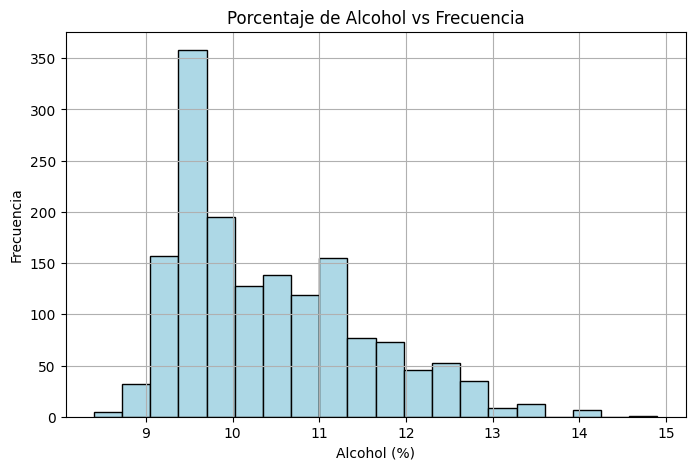

In [212]:
# Gráfico 1: Histograma
plt.figure(figsize=(8, 5))
plt.hist(df_red_wine['alcohol'], bins=20, color='lightblue', edgecolor='black')
plt.title('Porcentaje de Alcohol vs Frecuencia')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

* En este gráfico podemos observar que la tendencia de los datos está orientada entre los 9% al 13% de alcohol en las muestras analizadas, teniendo la mayor frecuencia en alrededor de 9,5% con una frecuencia superior a 350, que equivale a más del 20% de la muestra total.

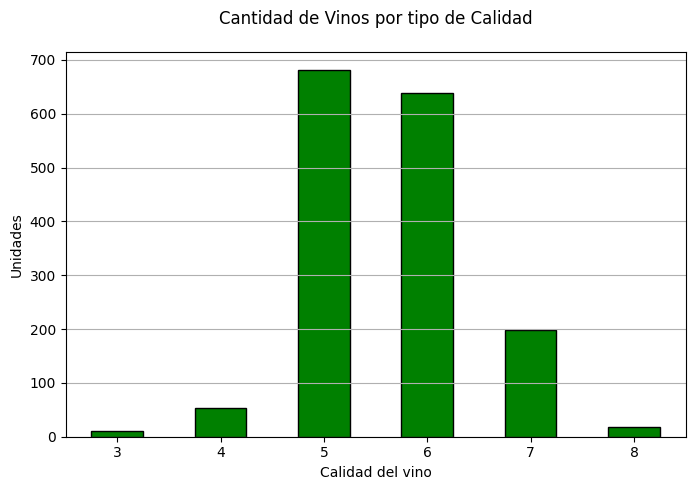

In [213]:
# Gráfico 2: Barras
plt.figure(figsize=(8, 5))
df_red_wine['quality'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Cantidad de Vinos por tipo de Calidad', pad= 20)
plt.xlabel('Calidad del vino')
plt.ylabel('Unidades')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

* Con este gráfico podemos observar que los datos analizados corresponden a vinos de una calidad media ya que la mayoría de los valores se encuentran representados en la columna 5 y 6 de calidad de un rango que va en esta categoría de 0 a 10.

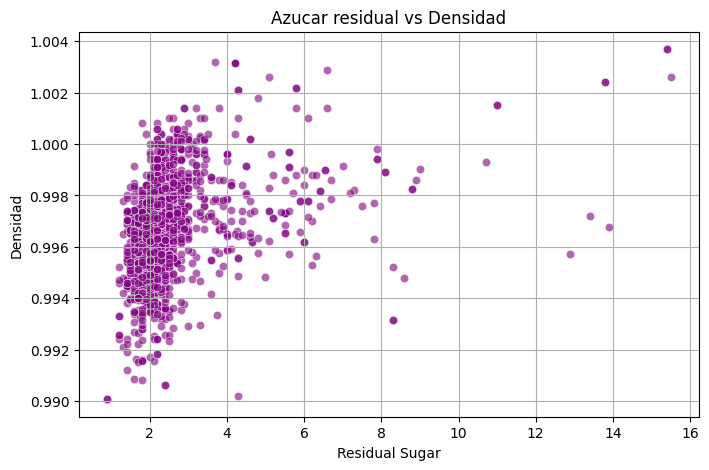

In [214]:
# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_red_wine, x='residual sugar', y='density', alpha=0.6, color='purple')
plt.title('Azucar residual vs Densidad')
plt.xlabel('Residual Sugar')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

* En este gráfico podemos observar que la mayoría de los datos se agrupan en los niveles de azucar residual baja, esto se explica porque es un patrón típico de los vinos tintos que son poco dulces.
* visualizamos algunos outliers que tienen mucha azucar residual, los que analizaré posteriormente en la sección de outliers para ver si es necesario quitarlos o modificarlos para que no afecten mi análisis final.

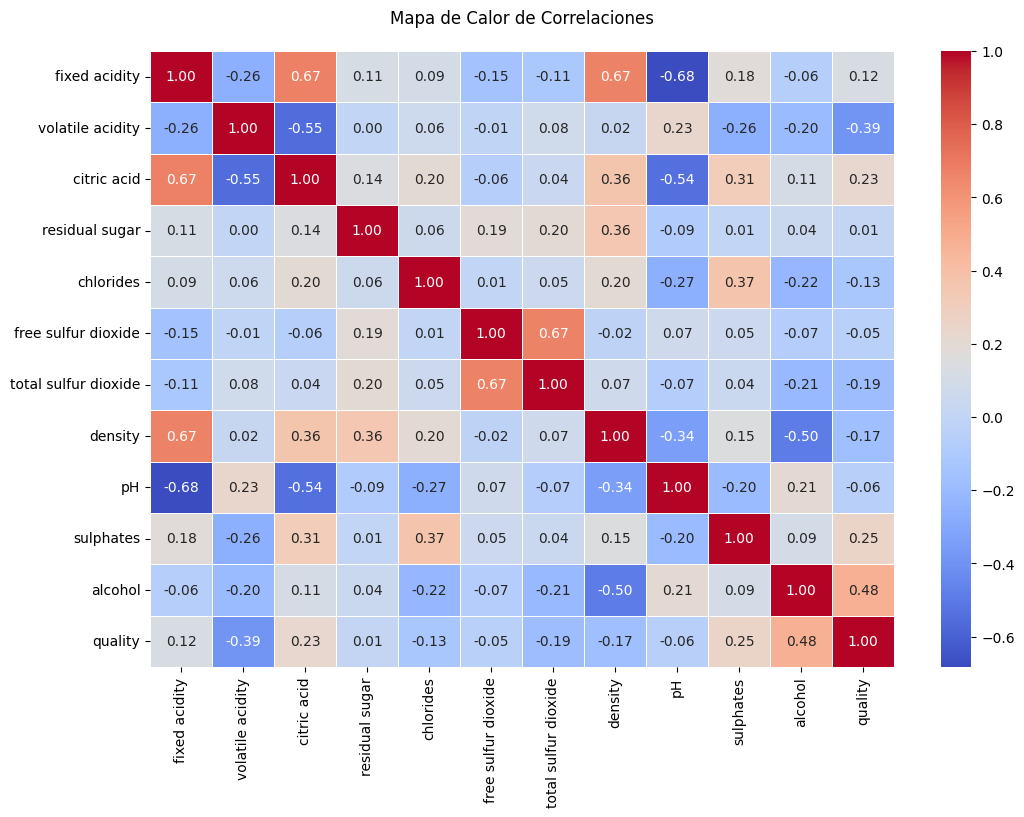

In [215]:
# Mapa de calor
plt.figure(figsize=(12, 8))
correlation = df_red_wine.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', pad=20)
plt.show()

* Al analizar el mapa de calor podemos ver que para quality las correlaciones postivivas son: alcohol (0.48), sulphates (0.25), citric acid (0.23) y fixed acidity (0.12).
* Respecto a las variables: densidad vs residual sugar analizado en el gráfico anterior, se comprueba que tienen una correlación positiva importante (0.36)

---
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset

In [216]:
# utilizo describe para visualizar los parámetros de estadística Descriptiva
df_red_wine.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


Al observar los datos estadísticos hay variables que tienen datos un poco fuera de rango máximo, por lo que procederé a aplicar IQR, que es un método estadítico que utilizamos en control de calidad para poder identificar de manera eficaz los outliers.

In [217]:
# Verifico Cantidad de Outliers
def detectar_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers[col] = outlier_count
    return pd.Series(outliers).sort_values(ascending=False)

detectar_outliers(df_red_wine)

,0
residual sugar,155
chlorides,112
sulphates,59
total sulfur dioxide,55
fixed acidity,49
density,45
pH,35
free sulfur dioxide,30
quality,28
volatile acidity,19


* Con esto vemos que hay variables con muchos outliers (por ejemplo en residual sugar equivalen a casi el 10%) y no conviene eliminarlos o imputarlos por el promedio. En este caso utilizaré capping para poder reemplazar esos datos por un valor aceptable.
* En el caso de los outliers que equivalen a menos del 3% del total de datos los reemplazaré por la mediana, esto porque no se ve afectada por los valores extremos, además porque normalmente en datos quimicos este tipo de variables tienen distribuiciones asimétricas.


In [218]:
# Defino las variables para poder hacer los cambios
variables_capping = ['residual sugar', 'chlorides', 'sulphates', 'total sulfur dioxide']
variables_reemplazo = ['fixed acidity','density', 'pH', 'free sulfur dioxide', 'citric acid', 'alcohol', 'quality', 'volatile acidity']

In [219]:
# Capping a las variables que seleccioné
def aplicar_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

df_tratado = df_red_wine.copy()

for col in variables_capping:
    df_tratado = aplicar_capping(df_tratado, col)


In [220]:
# Reemplazo los datos con menos outliers con la mediana.
def reemplazar_outliers_por_mediana(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mediana = df[col].median()
    df[col] = df[col].apply(lambda x: mediana if x < lower or x > upper else x)
    return df

for col in variables_reemplazo:
    df_tratado = reemplazar_outliers_por_mediana(df_tratado, col)

* Realizo boxplots para visualizar cómo quedan los datos despues de los reemplazos.

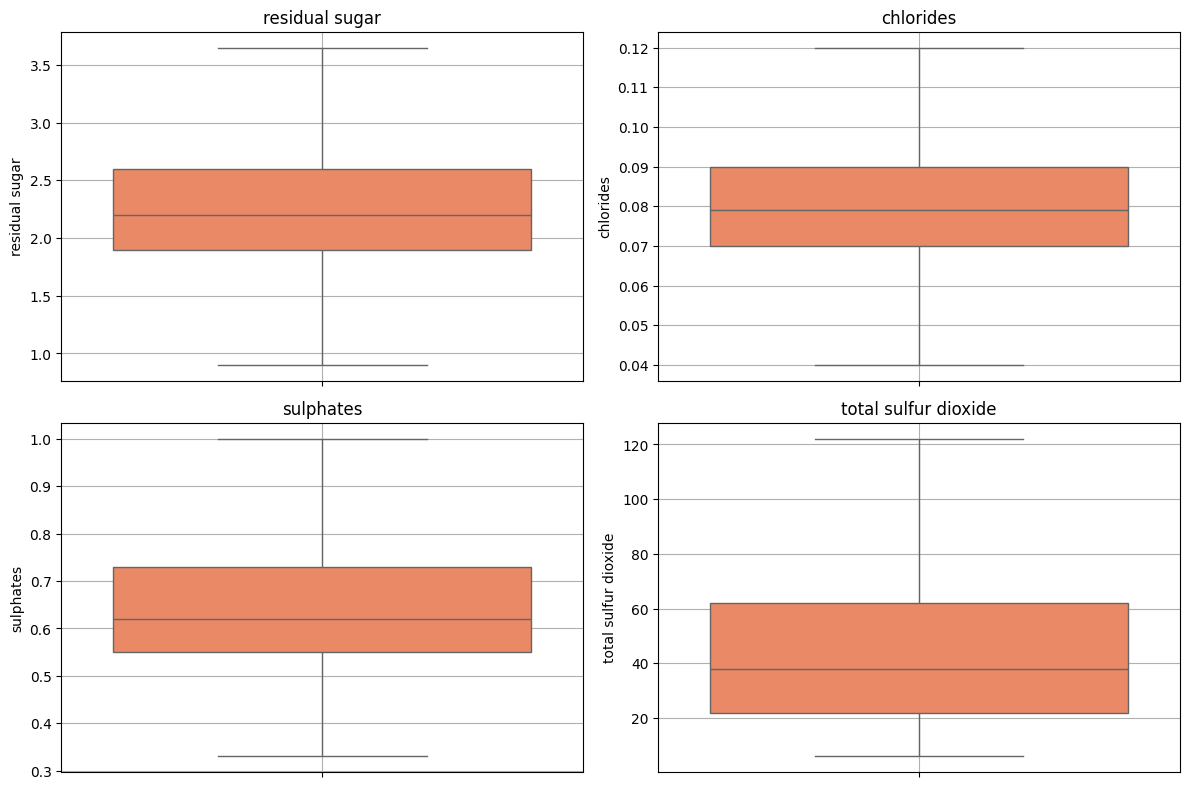

In [221]:
# Variables tratadas con capping
vars_capping = ['residual sugar', 'chlorides', 'sulphates', 'total sulfur dioxide']

plt.figure(figsize=(12, 8))
for i, col in enumerate(vars_capping, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df_tratado[col], color='coral')
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()


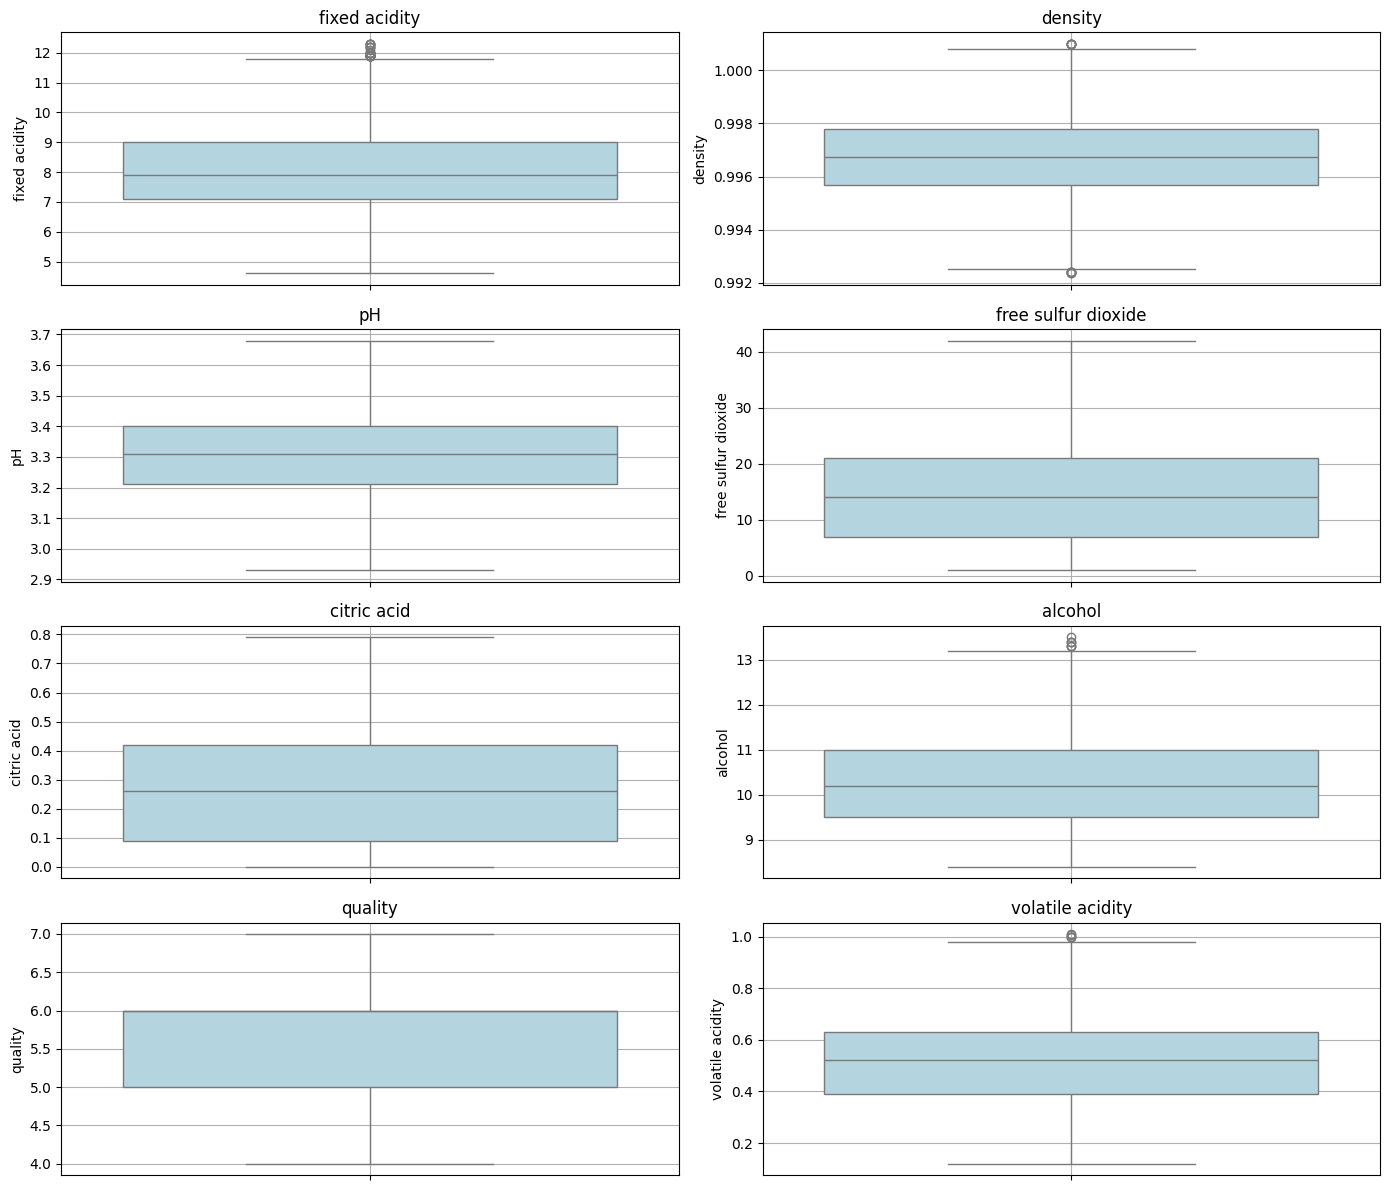

In [222]:
# Variables tratadas con reemplazo por mediana
vars_mediana = ['fixed acidity','density', 'pH', 'free sulfur dioxide', 'citric acid', 'alcohol', 'quality', 'volatile acidity']

plt.figure(figsize=(14, 12))
for i, col in enumerate(vars_mediana, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(df_tratado[col], color='lightblue')
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

* Ahora que mis datos están limpios y sin tantos datos extremos fuera de rango procederé a la implementación de modelos solicitados.

# Modelos
---

In [223]:
# Modelos de Clasificación para Calidad de Vino Tinto
# División de features (X) y Target ó variable objetivo (Y)

X = df_tratado.drop('quality', axis=1)
y = df_tratado['quality']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#NO REALIZO DIVISIÓN DE FEATURES SEGÚN VARIABLE YA QUE TODAS SON NUMERALES POR LO QUE PROCEDO A REALIZAR EL PREPROCESAMIENTO

# Escalado aplicamos StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

# MODELOS

# APLICO LOS MODELOS SOLICITADOS
print("IMPLEMENTACIÓN DE MODELOS")

# Logistic Regression
print("Logistic Regression")
lr_modelo = LogisticRegression(random_state=42, max_iter=1000)
lr_modelo.fit(X_train_scaled, y_train)
lr_pred = lr_modelo.predict(X_test_scaled)

accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# # Métricas adicionales solicitadas para Logistic Regression
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

# Imprimo para visualizar los resultados
print(f"Precision del modelo: {lr_precision:.2f}")
print(f"Recall del modelo: {lr_recall:.2f}")
print(f"F1-Score del modelo: {lr_f1:.2f}")

# K-Nearest Neighbors (KNN)

print("K-Nearest Neighbors (KNN)")

# Agrupar tipos de features para poder utilizar Pipeline
num_cols = X_train.columns.tolist()

# Creo preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols)])

# Creo Pipeline.
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=1))])

# Entrenar.
pipeline.fit(X_train, y_train)

# Predecir.
knn_pred = pipeline.predict(X_test)

# Evaluar.
accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy de KNN: {accuracy:.2f}")

# Métricas adicionales para KNN
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

print(f"Precision del modelo KNN: {knn_precision:.4f}")
print(f"Recall del modelo KNN: {knn_recall:.4f}")
print(f"F1-Score del modelo KNN: {knn_f1:.4f}")

IMPLEMENTACIÓN DE MODELOS
Logistic Regression
Accuracy del modelo: 0.57
Precision del modelo: 0.55
Recall del modelo: 0.57
F1-Score del modelo: 0.56
K-Nearest Neighbors (KNN)
Accuracy de KNN: 0.64
Precision del modelo KNN: 0.6369
Recall del modelo KNN: 0.6375
F1-Score del modelo KNN: 0.6367


#Comparacion Modelos
---

In [224]:
# Primero debo crear una Función para poder evaluar los modelos contando todas las métricas
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return [accuracy, precision, recall, f1]

# Funciones para poder evaluar ambos modelos
lr_metrics = evaluate_model(y_test, lr_pred, "Logistic Regression")
knn_metrics = evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")

print(" TABLA DE COMPARACIÓN DE MÉTRICAS AMBOS MODELOS")

# Creo un DataFrame con las métricas
df_comparacion = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': lr_metrics,
    'K-Nearest Neighbors': knn_metrics})

df_comparacion.round(4)

 TABLA DE COMPARACIÓN DE MÉTRICAS AMBOS MODELOS


,Métrica,Logistic Regression,K-Nearest Neighbors
0,Accuracy,0.5750,0.6375
1,Precision,0.5517,0.6369
2,Recall,0.5750,0.6375
3,F1-Score,0.5594,0.6367


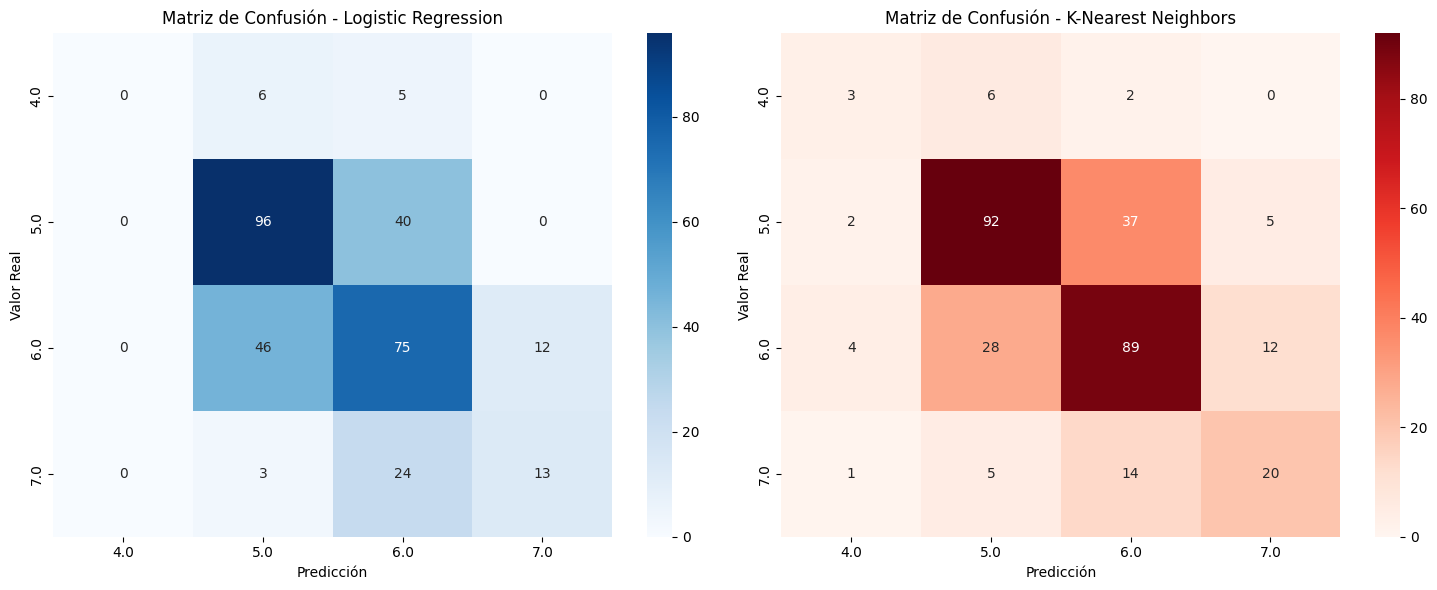

In [225]:
# Matriz de confusión - Logistic Regression
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

# Matriz de confusión - KNN
plt.subplot(1, 2, 2)
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Matriz de Confusión - K-Nearest Neighbors')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

Al analizar ambas matrices de confusión podemos observar lo siguiente:



1.   Logistic Regression


* Acertó 96 veces la clase 5 y 76 veces la clase 6, lo cual es muy bueno.
*  Se equivocó algunas veces en vinos con calidad más alta, como los de calidad 7, pero eso es esperable porque hay muy pocos ejemplos de esas clases.

2.  K-Nearest Neighbors (KNN)

* Este modelo acierta varias veces, por ejemplo 92 veces la clase 5, y 89 la clase 6



In [226]:
# CONCLUSIONES
print("CONCLUSIONES DEL ANÁLISIS")

# Determinar el mejor modelo
if lr_metrics[0] > knn_metrics[0]:  # Comparo los accuracy
    mejor_modelo = "Logistic Regression"
    mejor_accuracy = lr_metrics[0]
else:
    mejor_modelo = "K-Nearest Neighbors"
    mejor_accuracy = knn_metrics[0]

print(f"\n🏆 MEJOR MODELO: {mejor_modelo}")
print(f"📊 Accuracy: {mejor_accuracy:.2f}")



CONCLUSIONES DEL ANÁLISIS

🏆 MEJOR MODELO: K-Nearest Neighbors
📊 Accuracy: 0.64


CONCLUSION FINAL ANÁLISIS WINE RED:

1.   La tendencia de los datos está orientada entre los 9% al 13% de alcohol en las muestras analizada y la mayor frecuencia se ubica alrededor de 9,5% y equivale a más del 20% de la muestra total.
2.   Pudimos observar cómo los diferentes valores físico-quimicos influyen en la calidad de este tipo de vino, por ejemplo cómo el porcentaje de alcohol se conecta con la calidad, mostrando una correlación positiva.
3.   El mejor modelo de predicción en este caso fué KNN con 0.64.




**EXTRA:**
Optimizacíon de Hiperparámetros.  

* Como complemento del análisis principal, aplicaré una optimización de hiperparámetros para el modelo KNN que fué con el que obtuve un mejor valor, utilizaré GridSearch, con el objetivo de encontrar el valor de k que maximize la precisión del modelo.

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print("Grid Search para modelo: KNN")

# Defino los features
num_cols_red = X_train.columns.tolist()

# Creo el preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols_red)])

# Creo Pipeline
pipeline_knn_red = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# Defino el espacio de búsqueda de hiperparámetros para KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__p': [1, 2]}

# Grid Search con validación cruzada
grid_search_knn_red = GridSearchCV(
    pipeline_knn_red,
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 )

# Ajusto el modelo
grid_search_knn_red.fit(X_train, y_train)

# Mejor modelo encontrado
mejor_knn_red = grid_search_knn_red.best_estimator_

# Predicción para test
knn_pred_opt_red = mejor_knn_red.predict(X_test)

# Evaluación con tu función ya creada
knn_opt_metrics_red= evaluate_model(y_test, knn_pred_opt_red, "KNN Optimizado")

# Mostrar métricas
print("\n📊 Métricas del modelo Li optimizado:")
for nombre, valor in zip(['Accuracy', 'Precision', 'Recall', 'F1-Score'], knn_opt_metrics_red):
    print(f"{nombre}: {valor:.2f}")

Grid Search para modelo: KNN
Fitting 5 folds for each of 84 candidates, totalling 420 fits

📊 Métricas del modelo Li optimizado:
Accuracy: 0.65
Precision: 0.63
Recall: 0.65
F1-Score: 0.64


#CONCLUSIONES DE OPTIMIZACIÓN
---
* Hay margen de mejora.
* Luego de aplicar Grid Search vemos que el acurracy aumentó a 0.65 con lo que podemos establecer que el rendimiento del modelo es moderado.




# 2. EDA DATA SET VINO BLANCO

In [245]:
# Reviso nuevamente la info de mi set
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [246]:
# Reviso si hay Nulos
df_white_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


* No hay datos Nulos

In [247]:
# Reviso si hay Duplicados
df_white_wine.duplicated().sum()

np.int64(937)

* Al aplicar la función de duplicados, ésta nos arroja que hay 937 datos duplicados

In [248]:
# Contar filas totales vs filas únicas
total_filas = len(df_white_wine)
filas_unicas = len(df_white_wine.drop_duplicates())
duplicados = total_filas - filas_unicas

print(f"Total de filas: {total_filas}")
print(f"Filas únicas: {filas_unicas}")
print(f"Duplicados: {duplicados}")
print(f"Porcentaje de duplicados: {duplicados/total_filas*100:.2f}%")

Total de filas: 4898
Filas únicas: 3961
Duplicados: 937
Porcentaje de duplicados: 19.13%


In [249]:
# Identificar en qué columnas están los duplicados
for col in df_white_wine.columns:
    dup_col = df_white_wine[col].duplicated().sum()
    print(f"{col}: {dup_col} duplicados ({dup_col/len(df_white_wine)*100:.1f}%)")

fixed acidity: 4830 duplicados (98.6%)
volatile acidity: 4773 duplicados (97.4%)
citric acid: 4811 duplicados (98.2%)
residual sugar: 4588 duplicados (93.7%)
chlorides: 4738 duplicados (96.7%)
free sulfur dioxide: 4766 duplicados (97.3%)
total sulfur dioxide: 4647 duplicados (94.9%)
density: 4008 duplicados (81.8%)
pH: 4795 duplicados (97.9%)
sulphates: 4819 duplicados (98.4%)
alcohol: 4795 duplicados (97.9%)
quality: 4891 duplicados (99.9%)


* Es normal que muchos vinos tengan valores similares en sus propiedades químicas, por lo tanto como comenté en set de datos de Vino tinto no es correcto eliminarlos.
* Para el caso de la columna quality con 99.9% duplicados sugiere que la mayoría de los datos se encuentran dentro de similares categorías de calidad.

Verificación y ajuste de tipos de datos:
 * Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [250]:
df_white_wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


* Se observa que las 11 variables fisico-químicas son tipo float, lo que está bien dado que estos datos normalmente se expresan con números decimales.
* En el caso de quality que es nuestra variable objetivo en este data set, vemos que es de tipo int por lo que no es necesario realizar un cambio.
---

# Corrección de inconsistencias en valores categóricos:
* Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

En este set de datos sólo tenemos variables numéricas, por lo que no es necesario realizar una corrección de categorías, pero si luego realizaré unas visualizaciones para determinar si hay outliers que puedan interferir en mi análisis.

# 2.Exploración de Datos
---

Visualizaciones univariadas y multivariadas:
* Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

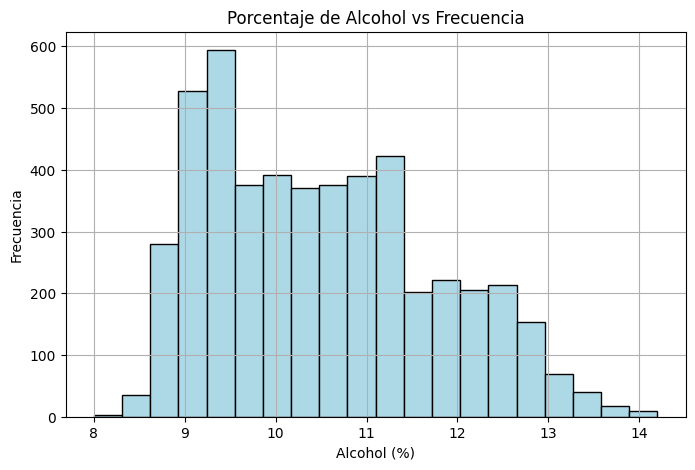

In [251]:
# Gráfico 1: Histograma
plt.figure(figsize=(8, 5))
plt.hist(df_white_wine['alcohol'], bins=20, color='lightblue', edgecolor='black')
plt.title('Porcentaje de Alcohol vs Frecuencia')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

* En este gráfico observamos que no son tan marcadas la frecuencia vs el porcentaje de alcohol vs a lo obserbado en el caso del vino tinto. Este gráfico nos indica que contamos con muestras más variadas respecto de su porcentaje de alcohol, el cuál tiene una mayor presencia entre el 9% hasta poco más de 11%.

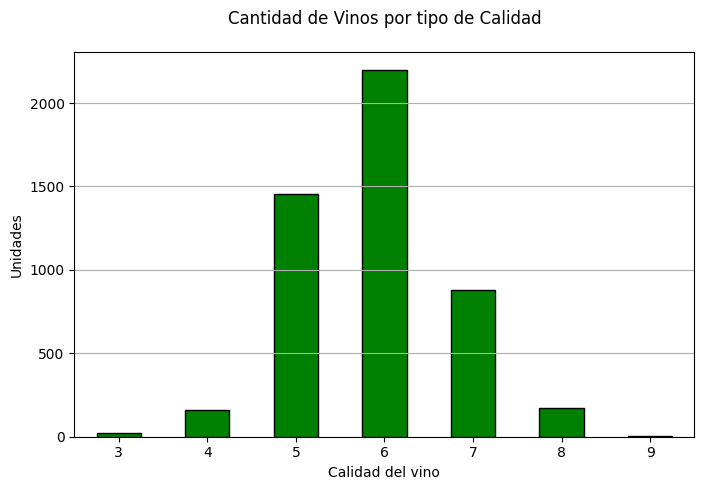

In [252]:
# Gráfico 2: Barras
plt.figure(figsize=(8, 5))
df_white_wine['quality'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Cantidad de Vinos por tipo de Calidad', pad= 20)
plt.xlabel('Calidad del vino')
plt.ylabel('Unidades')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

* En este gráfico notamos que la calidad 6 es la que cuenta con mayores registros, si lo comparamos con el vino tinto ambos son vinos de mediana calidad.

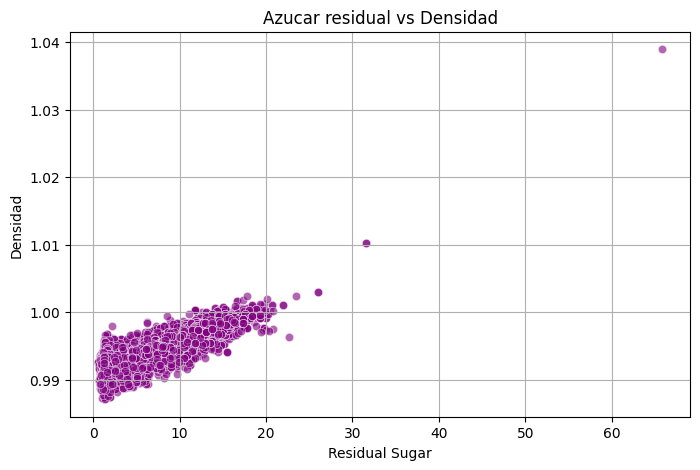

In [253]:
# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_white_wine, x='residual sugar', y='density', alpha=0.6, color='purple')
plt.title('Azucar residual vs Densidad')
plt.xlabel('Residual Sugar')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

* En este caso observamos que los niveles de Azucar residual son mucho mayores ubicandose entre 0 a 20. Esto se explica porque los vinos Blancos tienen variedades que se caracterizan por se más dulces y no secos (baja cantidad de azucar) como los vinos tintos.
* La densidad es similar, ya que es normal que tenga un rango estrecho para esta variable.

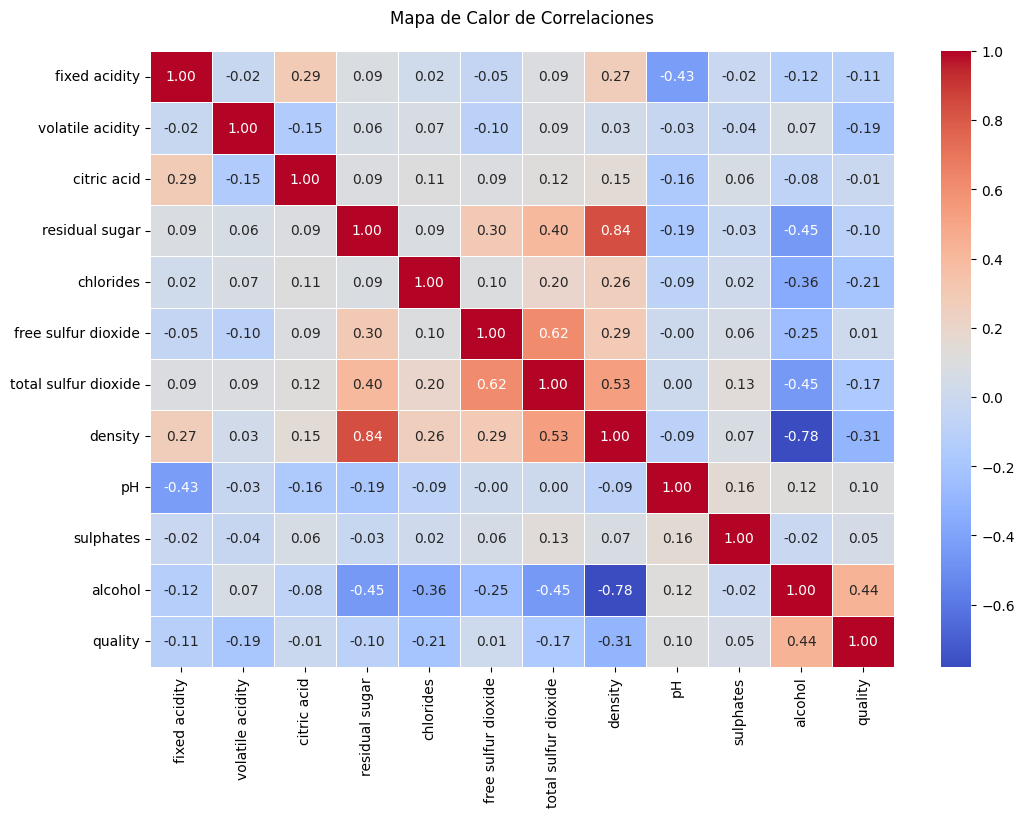

In [254]:
# Mapa de calor
plt.figure(figsize=(12, 8))
correlation = df_white_wine.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', pad=20)
plt.show()

* En este mapa de calor podemos observar la gran correlación que hay entre la densidad y el azucar residual (0.84) bastante cercano a 1.0
* En este caso la calidad tiene una relación de 0.44 vs el % de alcohol.
* LLama la atención que el alcohol vs la densidad tienen una fuerte correlación negativa, lo que nos indica que a mayor contenido alcoholico menor será su densidad y eso concuerda con las propiedades físícas del etanol.

---
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset

In [264]:
# utilizo describe para visualizar los parámetros de estadística Descriptiva
df_white_wine.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.0,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.0,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.0,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.0,0.49,0.11,0.22,0.41,0.47,0.55,1.08


Al observar los datos estadísticos hay variables que tienen datos un poco fuera de rango máximo, por lo que procederé a aplicar IQR, que es un método estadítico que utilizamos en control de calidad para poder identificar de manera eficaz los outliers.

In [256]:
# Verifico Cantidad de Outliers
def detectar_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers[col] = outlier_count
    return pd.Series(outliers).sort_values(ascending=False)

detectar_outliers(df_white_wine)

,0
citric acid,270
chlorides,208
quality,200
volatile acidity,186
sulphates,124
fixed acidity,119
pH,75
free sulfur dioxide,50
total sulfur dioxide,19
residual sugar,7


* En este caso podemos observar que la variable que cuenta con más outliers es citric acid con 270, estos datos equivalen al 5% del total de datos, y las demás variables cuentan con porcentajes mucho menores por lo que reemplazaré dichos datos por la mediana que es más conveniente para este caso, menos variabilidad.


In [265]:
# Defino las variables para poder hacer los cambios
variables_reemplazo_white = ['citric acid', 'chlorides','quality', 'volatile acidity', 'sulphates', 'fixed acidity', 'pH', 'free sulfur dioxide', 'residual sugar','density', 'alcohol', ]

In [266]:
# Reemplazo los datos con menos outliers con la mediana.
def reemplazar_outliers_white(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mediana = df[col].median()
    df[col] = df[col].apply(lambda x: mediana if x < lower or x > upper else x)
    return df

df_tratado_whitewine = df_white_wine.copy()

for col in variables_reemplazo:
    df_tratado_whitewine = reemplazar_outliers_white(df_tratado_whitewine, col)

* Realizo boxplots para visualizar cómo quedan los datos despues de los reemplazos.

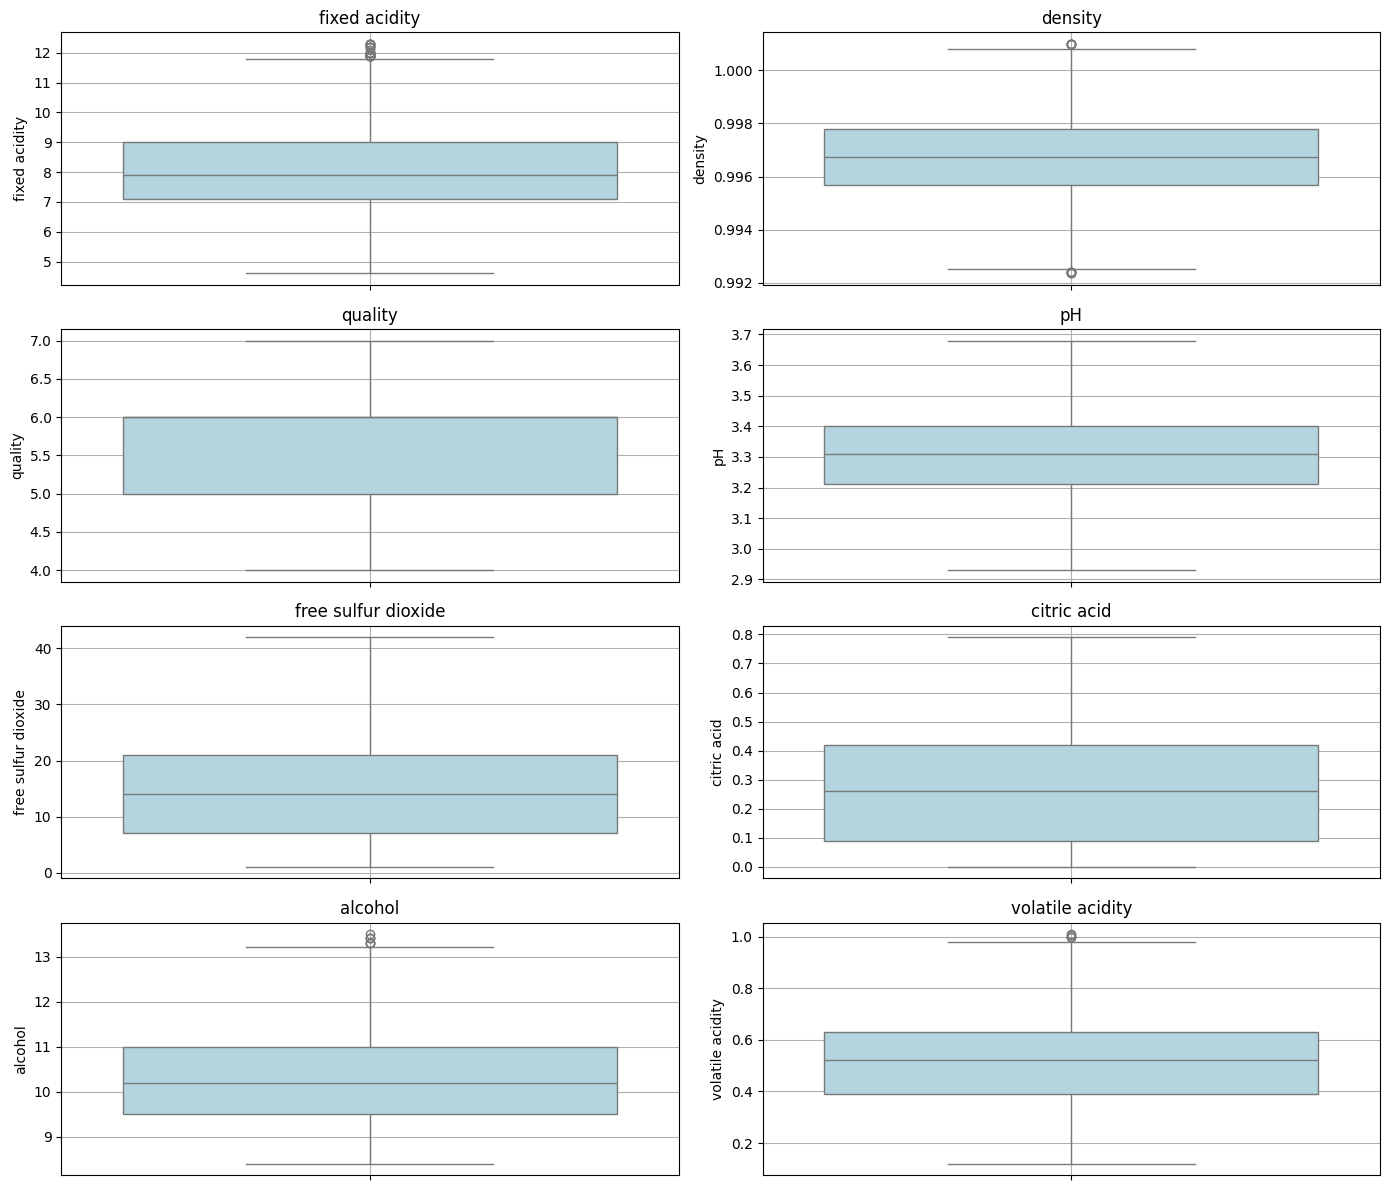

In [267]:
# Variables tratadas con reemplazo por mediana
vars_mediana_whitewine = ['fixed acidity','density', 'quality', 'pH', 'free sulfur dioxide', 'citric acid', 'alcohol', 'volatile acidity']

plt.figure(figsize=(14, 12))
for i, col in enumerate(vars_mediana_whitewine, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(df_tratado[col], color='lightblue')
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

* Ahora que mis datos están limpios y sin tantos datos extremos fuera de rango procederé a la implementación de modelos solicitados.

In [268]:
# Modelos de Clasificación para Calidad de Vino Blanco
# División de features (X) y Target ó variable objetivo (Y)

X = df_tratado_whitewine.drop('quality', axis=1)
y = df_tratado_whitewine['quality']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#NO REALIZO DIVISIÓN DE FEATURES SEGÚN VARIABLE YA QUE TODAS SON NUMERALES POR LO QUE PROCEDO A REALIZAR EL PREPROCESAMIENTO

# Escalado aplicamos StandardScaler
scaler_white = StandardScaler()
X_train_scaled_white = scaler.fit_transform(X_train)
X_test_scaled_white= scaler.transform(X_test)

X_train_scaled_white

# MODELOS

# APLICO LOS MODELOS SOLICITADOS
print("IMPLEMENTACIÓN DE MODELOS")

# Logistic Regression
print("Logistic Regression")
lr_modelo_white = LogisticRegression(random_state=42, max_iter=1000)
lr_modelo_white.fit(X_train_scaled_white, y_train)
lr_pred_white = lr_modelo_white.predict(X_test_scaled)

accuracy = accuracy_score(y_test, lr_pred_white)
print(f"Accuracy del modelo: {accuracy:.2f}")

# # Métricas adicionales solicitadas para Logistic Regression
lr_precision_white = precision_score(y_test, lr_pred_white, average='weighted')
lr_recall_white = recall_score(y_test, lr_pred_white, average='weighted')
lr_f1_white = f1_score(y_test, lr_pred_white, average='weighted')

# Imprimo para visualizar los resultados
print(f"Precision del modelo: {lr_precision_white:.2f}")
print(f"Recall del modelo: {lr_recall_white:.2f}")
print(f"F1-Score del modelo: {lr_f1_white:.2f}")

# K-Nearest Neighbors (KNN)

print("K-Nearest Neighbors (KNN)")

# Agrupar tipos de features para poder utilizar Pipeline
num_cols_white = X_train.columns.tolist()

# Creo preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols_white)])

# Creo Pipeline.
pipeline_white = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=1))])

# Entrenar.
pipeline_white.fit(X_train, y_train)

# Predecir.
knn_pred_white = pipeline_white.predict(X_test)

# Evaluar.
accuracy = accuracy_score(y_test, knn_pred_white)
print(f"Accuracy de KNN: {accuracy:.2f}")

# Métricas adicionales para KNN
knn_precision_white = precision_score(y_test, knn_pred_white, average='weighted')
knn_recall_white = recall_score(y_test, knn_pred_white, average='weighted')
knn_f1_white = f1_score(y_test, knn_pred_white, average='weighted')

print(f"Precision del modelo KNN: {knn_precision_white:.4f}")
print(f"Recall del modelo KNN: {knn_recall_white:.4f}")
print(f"F1-Score del modelo KNN: {knn_f1_white:.4f}")

IMPLEMENTACIÓN DE MODELOS
Logistic Regression
Accuracy del modelo: 0.56
Precision del modelo: 0.54
Recall del modelo: 0.56
F1-Score del modelo: 0.52
K-Nearest Neighbors (KNN)
Accuracy de KNN: 0.66
Precision del modelo KNN: 0.6538
Recall del modelo KNN: 0.6561
F1-Score del modelo KNN: 0.6541


* Se observa que KNN tiene la mejor performance con un accuracy de 0.65 vs LR con 0.56

# Comparacion Modelos
---

In [269]:
# Primero debo crear una Función para poder evaluar los modelos contando todas las métricas
def evaluate_model_white(y_true, knn_pred_white, model_name):
    accuracy = accuracy_score(y_true, knn_pred_white)
    precision = precision_score(y_true, knn_pred_white, average='weighted')
    recall = recall_score(y_true, knn_pred_white, average='weighted')
    f1 = f1_score(y_true, knn_pred_white, average='weighted')

    return [accuracy, precision, recall, f1]

# Funciones para poder evaluar ambos modelos
lr_metrics_white = evaluate_model_white(y_test, lr_pred_white, "Logistic Regression")
knn_metrics_white = evaluate_model_white(y_test, knn_pred_white, "K-Nearest Neighbors")

print(" TABLA DE COMPARACIÓN DE MÉTRICAS AMBOS MODELOS")

# Creo un DataFrame con las métricas
df_comparacion_white = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': lr_metrics_white,
    'K-Nearest Neighbors': knn_metrics_white})

df_comparacion_white.round(4)

 TABLA DE COMPARACIÓN DE MÉTRICAS AMBOS MODELOS


,Métrica,Logistic Regression,K-Nearest Neighbors
0,Accuracy,0.5592,0.6561
1,Precision,0.5443,0.6538
2,Recall,0.5592,0.6561
3,F1-Score,0.5157,0.6541


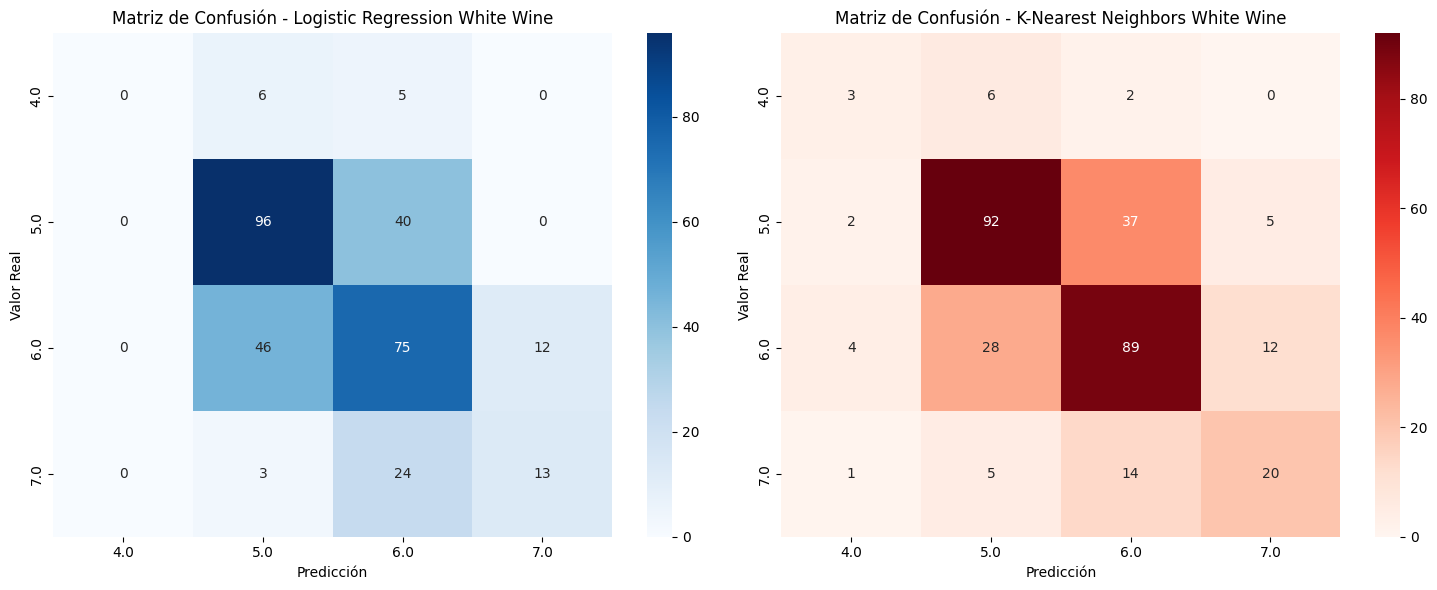

In [270]:
# Matriz de confusión - Logistic Regression white
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cm_lr_white = confusion_matrix(y_test, lr_pred_white)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Matriz de Confusión - Logistic Regression White Wine')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

# Matriz de confusión - KNN White
plt.subplot(1, 2, 2)
cm_knn_white = confusion_matrix(y_test, knn_pred_white)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title('Matriz de Confusión - K-Nearest Neighbors White Wine')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

* Al igual que en el data set de vino Tinto observamos que KNN nos arroja mejores valores dentro de la matriz de confusión.

In [271]:
# CONCLUSIONES
print("CONCLUSIONES DEL ANÁLISIS")

# Determinar el mejor modelo
if lr_metrics_white[0] > knn_metrics_white[0]:  # Comparo los accuracy
    mejor_modelo_white = "Logistic Regression"
    mejor_accuracy_white = lr_metrics_white[0]
else:
    mejor_modelo_white = "K-Nearest Neighbors"
    mejor_accuracy_white = knn_metrics_white[0]

print(f"\n🏆 MEJOR MODELO: {mejor_modelo_white}")
print(f"📊 Accuracy: {mejor_accuracy_white:.2f}")



CONCLUSIONES DEL ANÁLISIS

🏆 MEJOR MODELO: K-Nearest Neighbors
📊 Accuracy: 0.66


CONCLUSION FINAL ANÁLISIS WINE WHITE:

1.   La tendencia de los datos pespecto del porcentaje de alcohol en las muestras analizada tienen una frecuencia no marcada como en el caso del vino tinto, sino que acá hay muestras significativas 9-11%.
2.   Pudimos observar cómo los diferentes valores físico-quimicos influyen en la calidad de este tipo de vino, por ejemplo cómo el porcentaje de alcohol se conecta negativamente con la densidad, y eso queda demostrado por la física.
Tambien es importante el azucar residual que en el caso de los vinos blancos es significativamente mayor vs los vinos tintos
3.   El mejor modelo de predicción en este caso fué KNN con 0.66.




**EXTRA:**
Optimizacíon de Hiperparámetros.  

* Como complemento del análisis principal, aplicaré una optimización de hiperparámetros para el modelo KNN que fué con el que obtuve un mejor valor, utilizaré GridSearch, con el objetivo de encontrar el valor de k que maximize la precisión del modelo.

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print("Grid Search para modelo: KNN")

# Defino los features
num_cols_white = X_train.columns.tolist()

# Creo el preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols_white)])

# Creo Pipeline
pipeline_knn_white = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# Defino el espacio de búsqueda de hiperparámetros para KNN
param_grid_knn_white = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__p': [1, 2]}

# Grid Search con validación cruzada
grid_search_knn_white = GridSearchCV(
    pipeline_knn_white,
    param_grid_knn_white,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 )

# Ajusto el modelo
grid_search_knn_white.fit(X_train, y_train)

# Mejor modelo encontrado
mejor_knn_white = grid_search_knn_white.best_estimator_

# Predicción para test
knn_pred_opt_white = mejor_knn_white.predict(X_test)

# Evaluación con tu función ya creada
knn_opt_metrics_white= evaluate_model(y_test, knn_pred_opt_white, "KNN Optimizado")

# Mostrar métricas
print("\n📊 Métricas del modelo KNN optimizado:")
for nombre, valor in zip(['Accuracy', 'Precision', 'Recall', 'F1-Score'], knn_opt_metrics_white):
    print(f"{nombre}: {valor:.2f}")

Grid Search para modelo: KNN
Fitting 5 folds for each of 84 candidates, totalling 420 fits

📊 Métricas del modelo KNN optimizado:
Accuracy: 0.68
Precision: 0.70
Recall: 0.68
F1-Score: 0.67


#CONCLUSIONES DE OPTIMIZACIÓN
---
* Hay margen de mejora.
* Luego de aplicar Grid Search vemos que el acurracy aumentó a 0.68 con lo que podemos establecer que el rendimiento del modelo es mucho mejor respecto al de Vino tinto.




# CONCLUSIONES FINALES DE ANALISIS DE WINE QUALITY.
---

Luego de analizar por separado ambos set de datos, podemos observar lo siguiente:


1.  El set de vino tinto era mucho meno que el de vino blanco, el cuál triplicaba en cantidad.
2.   Ambos vinos se les midieron los mismos parámetros fisico-químicos, pero al realizar el análisis observamos que hay parametros que difieren entre ellos, como el azucar residual que es un valor mucho mayor vs al del vino tinto que normalmente se consideran "secos" o bajo nivel de azucar.
3. El modelo que mostró mejores resultados fué KNN para ambos vinos, pero es importante indicar que para el caso del vino blanco funcionó mejor. Esto lo asocio a la mayor cantidad de datos presentes en el set.

